In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Importation des donnees :

In [4]:
data=pd.read_csv("C:/Users/mouns/Documents/DATA/programme-etude/M2_data ingenieur et ai/ML/ml-ece-2023/wine_data.csv")
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            8.9              0.38         0.40             2.2      0.068   
1            6.7              0.46         0.24             1.7      0.077   
2            6.8              0.48         0.25             2.0      0.076   
3            5.8              0.68         0.02             1.8      0.087   
4            8.5              0.32         0.42             2.3      0.075   

   free sulfur dioxide  total sulfur dioxide  density  sulphates  alcohol  \
0                 12.0                  28.0  0.99486       0.75     12.6   
1                 18.0                  34.0  0.99480       0.60     10.6   
2                 29.0                  61.0  0.99530       0.60     10.4   
3                 21.0                  94.0  0.99440       0.52     10.0   
4                 12.0                  19.0  0.99434       0.71     11.8   

   quality acidity  
0        7  medium  
1        6  medium  
2        5  medium  
3        5  medium  
4        7    high

In [5]:
data.shape

(914, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914 entries, 0 to 913
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         914 non-null    float64
 1   volatile acidity      914 non-null    float64
 2   citric acid           914 non-null    float64
 3   residual sugar        914 non-null    float64
 4   chlorides             914 non-null    float64
 5   free sulfur dioxide   914 non-null    float64
 6   total sulfur dioxide  914 non-null    float64
 7   density               914 non-null    float64
 8   sulphates             914 non-null    float64
 9   alcohol               914 non-null    float64
 10  quality               914 non-null    int64  
 11  acidity               914 non-null    object 
dtypes: float64(10), int64(1), object(1)
memory usage: 85.8+ KB


In [7]:
data_ev=pd.read_csv("C:/Users/mouns/Documents/DATA/programme-etude/M2_data ingenieur et ai/ML/ml-ece-2023/evaluation_set.csv")
data_ev.head()

id  fixed acidity  volatile acidity  citric acid  residual sugar  \
0   0            6.6             0.440         0.09             2.2   
1   1            9.5             0.885         0.27             2.3   
2   2            8.8             0.460         0.45             2.6   
3   3            7.8             0.630         0.48             1.7   
4   4            5.6             0.500         0.09             2.3   

   chlorides  free sulfur dioxide  total sulfur dioxide  density  sulphates  \
0      0.063                  9.0                  18.0  0.99444       0.69   
1      0.084                 31.0                 145.0  0.99780       0.53   
2      0.065                  7.0                  18.0  0.99470       0.79   
3      0.100                 14.0                  96.0  0.99610       0.62   
4      0.049                 17.0                  99.0  0.99370       0.63   

   alcohol acidity  
0     11.3  medium  
1      9.4  medium  
2     14.0  medium  
3      9.5  medium  
4     13.0     low

In [8]:
data_ev.shape

(229, 12)

# analyse des donnees :

In [286]:
data_ev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    229 non-null    int64  
 1   fixed acidity         229 non-null    float64
 2   volatile acidity      229 non-null    float64
 3   citric acid           229 non-null    float64
 4   residual sugar        229 non-null    float64
 5   chlorides             229 non-null    float64
 6   free sulfur dioxide   229 non-null    float64
 7   total sulfur dioxide  229 non-null    float64
 8   density               229 non-null    float64
 9   sulphates             229 non-null    float64
 10  alcohol               229 non-null    float64
 11  acidity               229 non-null    object 
dtypes: float64(10), int64(1), object(1)
memory usage: 21.6+ KB


In [287]:
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count     914.000000        914.000000   914.000000      914.000000   
mean        8.306018          0.532670     0.267998        2.558753   
std         1.769214          0.180907     0.197922        1.424121   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.391250     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

        chlorides  free sulfur dioxide  total sulfur dioxide     density  \
count  914.000000           914.000000            914.000000  914.000000   
mean     0.088385            15.628009             46.348468    0.996749   
std      0.049668            10.342546             32.788149    0.001968   
min      0.012000             1.000000              7.000000    0.990070   
25%      0.071000             7.000000             21.000000    0.995600   
50%      0.080000            13.000000             37.500000    0.996655   
75%      0.091000            21.000000             62.000000    0.997857   
max      0.611000            68.000000            289.000000    1.003690   

        sulphates     alcohol     quality  
count  914.000000  914.000000  914.000000  
mean     0.661061   10.423322    5.664114  
std      0.176418    1.082140    0.806520  
min      0.330000    8.400000    3.000000  
25%      0.550000    9.500000    5.000000  
50%      0.620000   10.100000    6.000000  
75%      0.730000   11.100000    6.000000  
max      2.000000   14.900000    8.000000

In [288]:
data['acidity'].unique()

array(['medium', 'high', 'low'], dtype=object)

In [289]:
data['quality'].unique()

array([7, 6, 5, 4, 8, 3], dtype=int64)

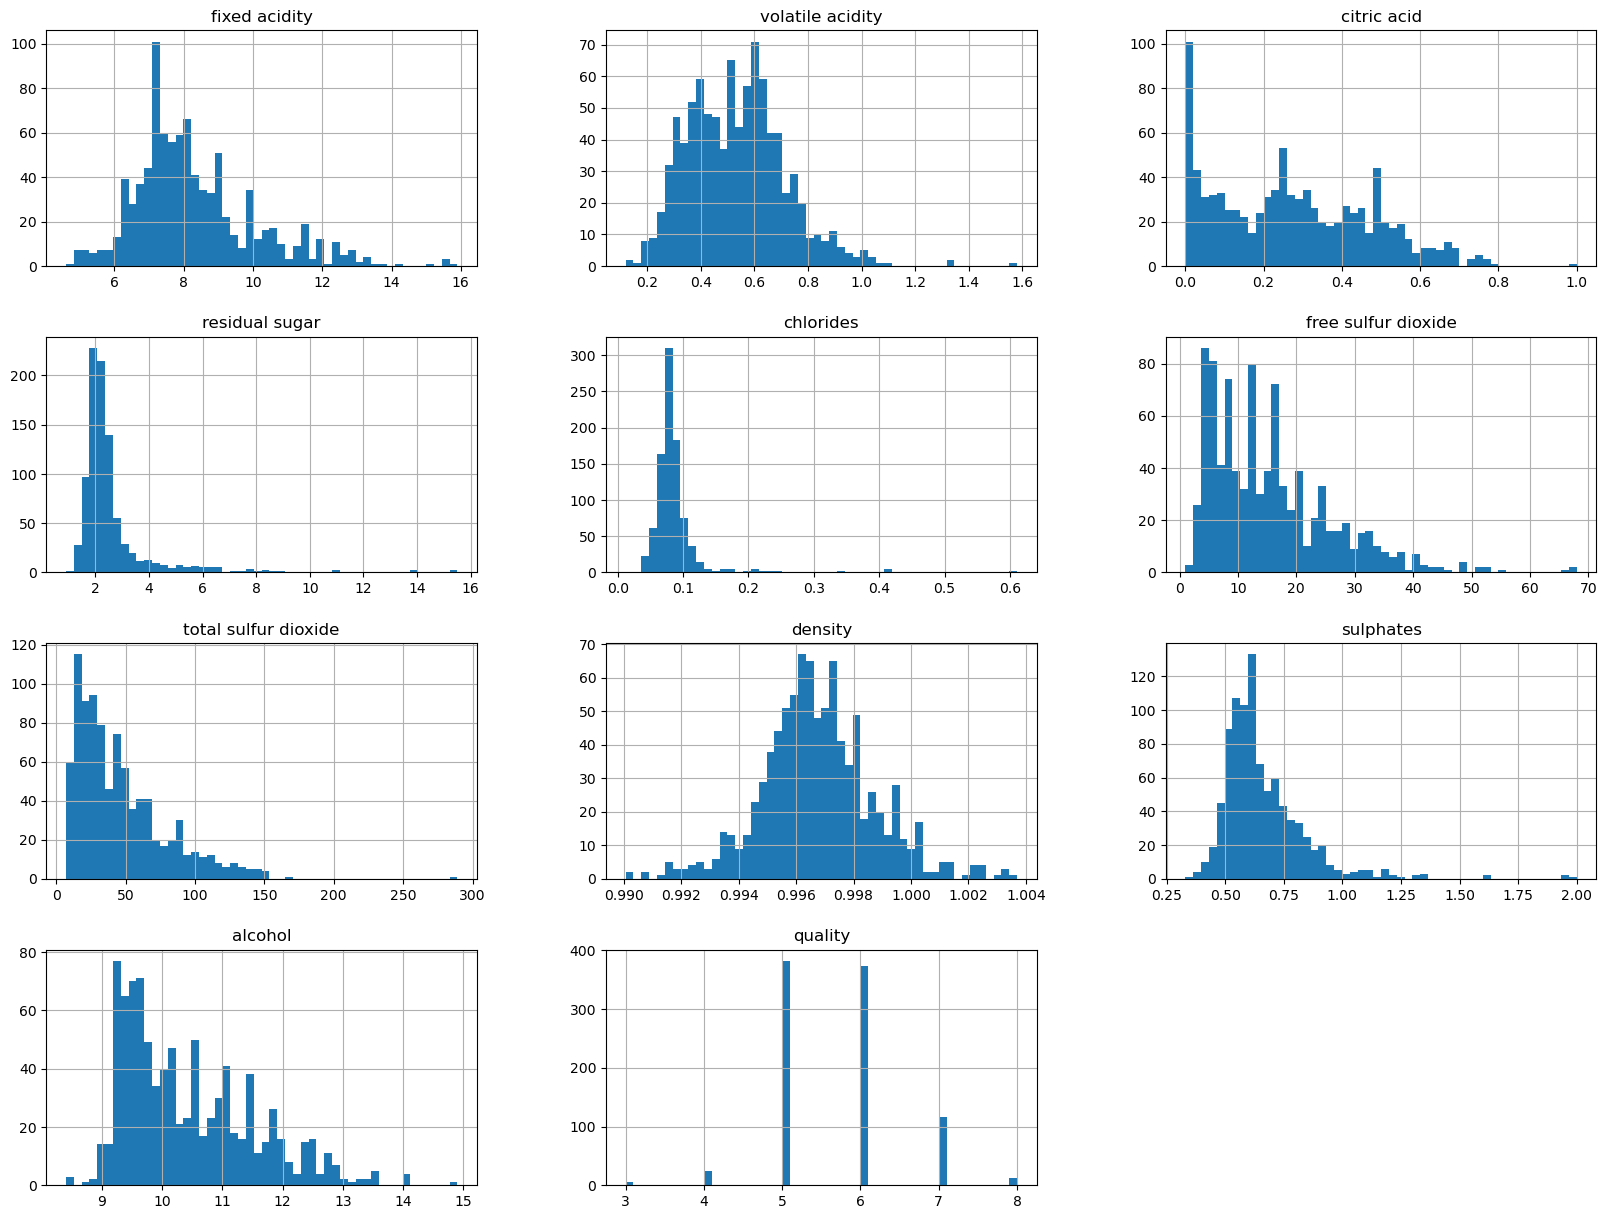

In [290]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

In [291]:
import seaborn as sb

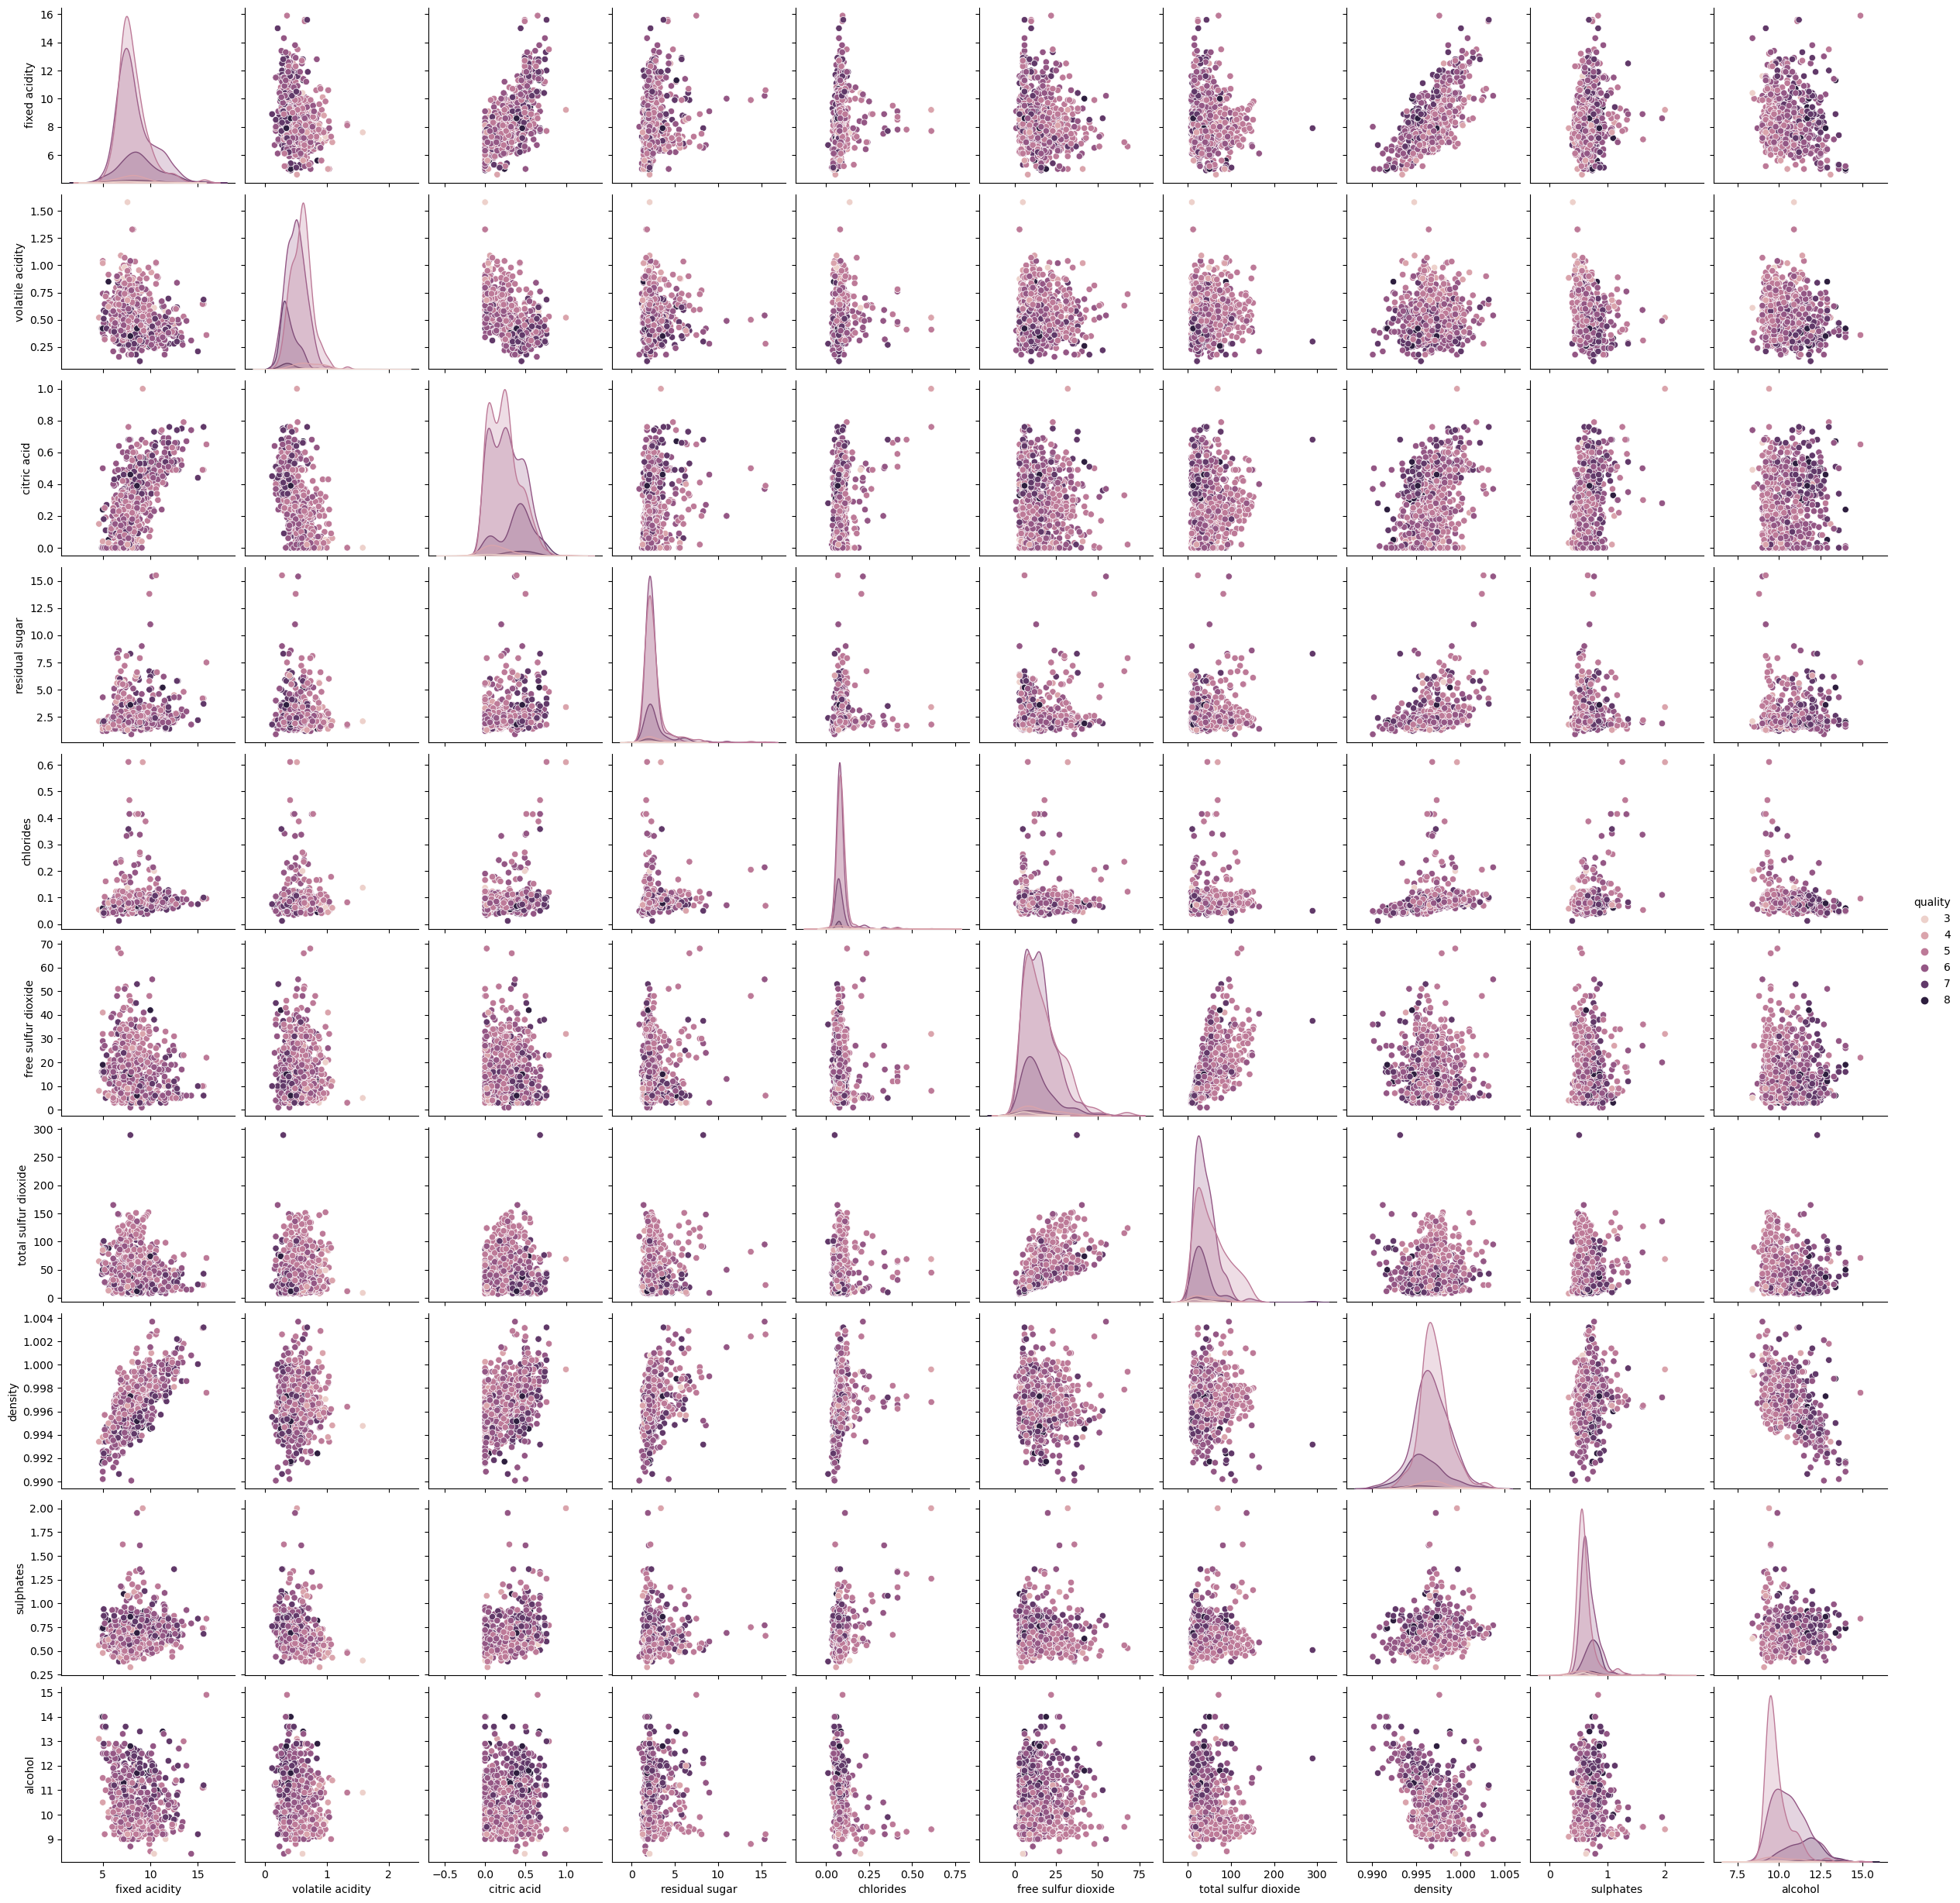

In [292]:
sb.pairplot(data,hue='quality')

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

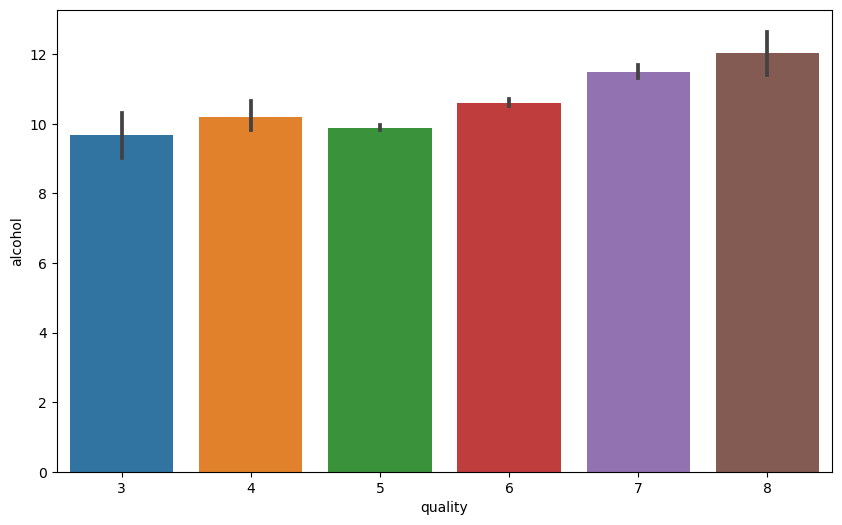

In [293]:
fig = plt.figure(figsize = (10,6))
sb.barplot(x = 'quality', y = 'alcohol', data = data)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

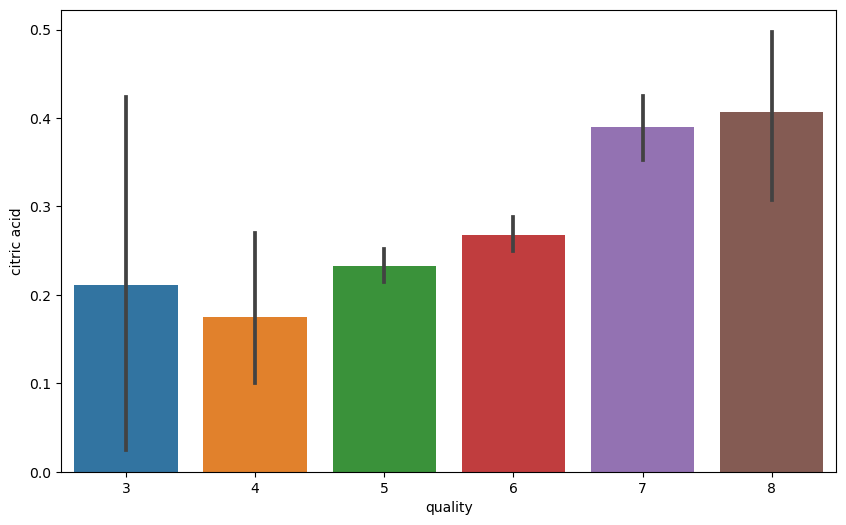

In [294]:
fig = plt.figure(figsize = (10,6))
sb.barplot(x = 'quality', y = 'citric acid', data = data)

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

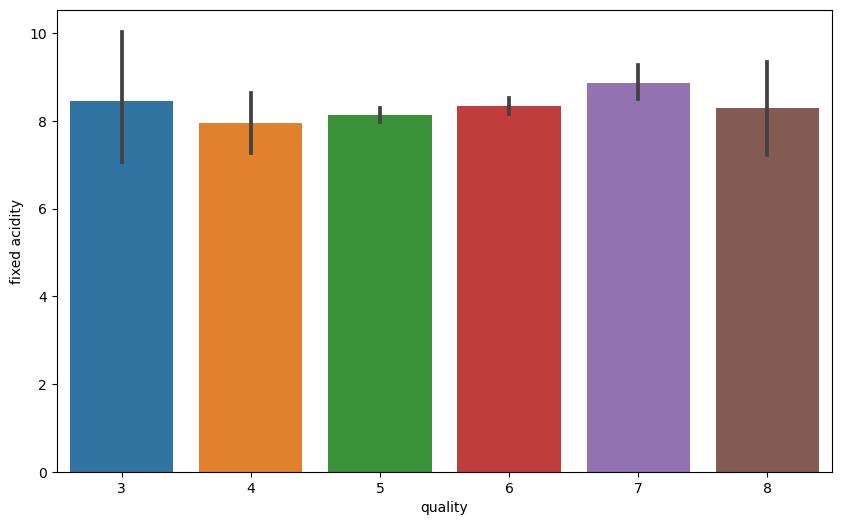

In [295]:
fig = plt.figure(figsize = (10,6))
sb.barplot(x = 'quality', y = 'fixed acidity', data = data)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

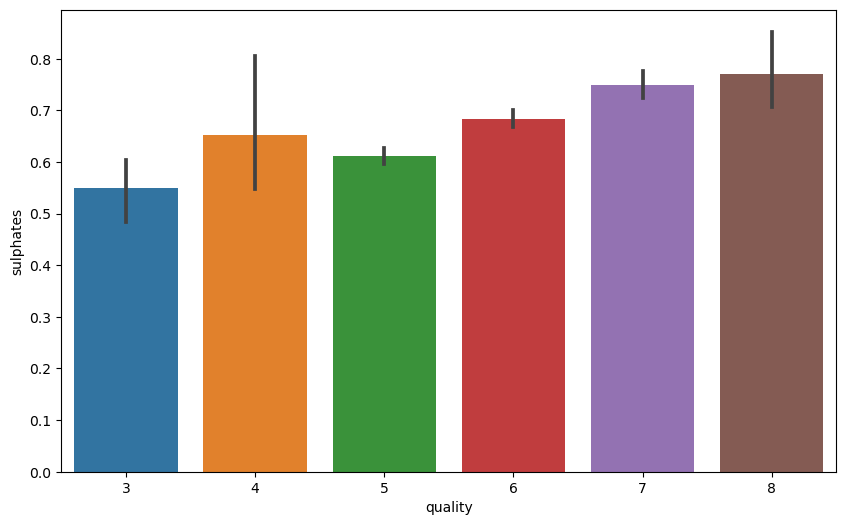

In [296]:
fig = plt.figure(figsize = (10,6))
sb.barplot(x = 'quality', y = 'sulphates', data = data)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

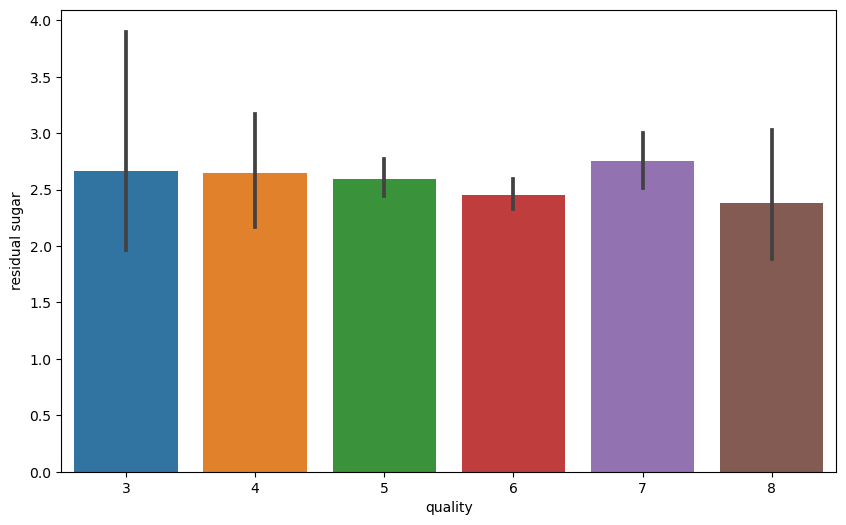

In [297]:
fig = plt.figure(figsize = (10,6))
sb.barplot(x = 'quality', y = 'residual sugar', data = data)

In [298]:
corr_matrix = data.corr()

In [299]:
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.490473
sulphates               0.265852
citric acid             0.250001
fixed acidity           0.114025
residual sugar         -0.002158
free sulfur dioxide    -0.066665
chlorides              -0.121969
density                -0.176736
total sulfur dioxide   -0.198707
volatile acidity       -0.428946
Name: quality, dtype: float64

array([[<AxesSubplot:xlabel='quality', ylabel='quality'>,
        <AxesSubplot:xlabel='alcohol', ylabel='quality'>,
        <AxesSubplot:xlabel='citric acid', ylabel='quality'>,
        <AxesSubplot:xlabel='sulphates', ylabel='quality'>,
        <AxesSubplot:xlabel='fixed acidity', ylabel='quality'>,
        <AxesSubplot:xlabel='residual sugar', ylabel='quality'>,
        <AxesSubplot:xlabel='free sulfur dioxide', ylabel='quality'>,
        <AxesSubplot:xlabel='volatile acidity', ylabel='quality'>],
       [<AxesSubplot:xlabel='quality', ylabel='alcohol'>,
        <AxesSubplot:xlabel='alcohol', ylabel='alcohol'>,
        <AxesSubplot:xlabel='citric acid', ylabel='alcohol'>,
        <AxesSubplot:xlabel='sulphates', ylabel='alcohol'>,
        <AxesSubplot:xlabel='fixed acidity', ylabel='alcohol'>,
        <AxesSubplot:xlabel='residual sugar', ylabel='alcohol'>,
        <AxesSubplot:xlabel='free sulfur dioxide', ylabel='alcohol'>,
        <AxesSubplot:xlabel='volatile acidity', ylabel='al

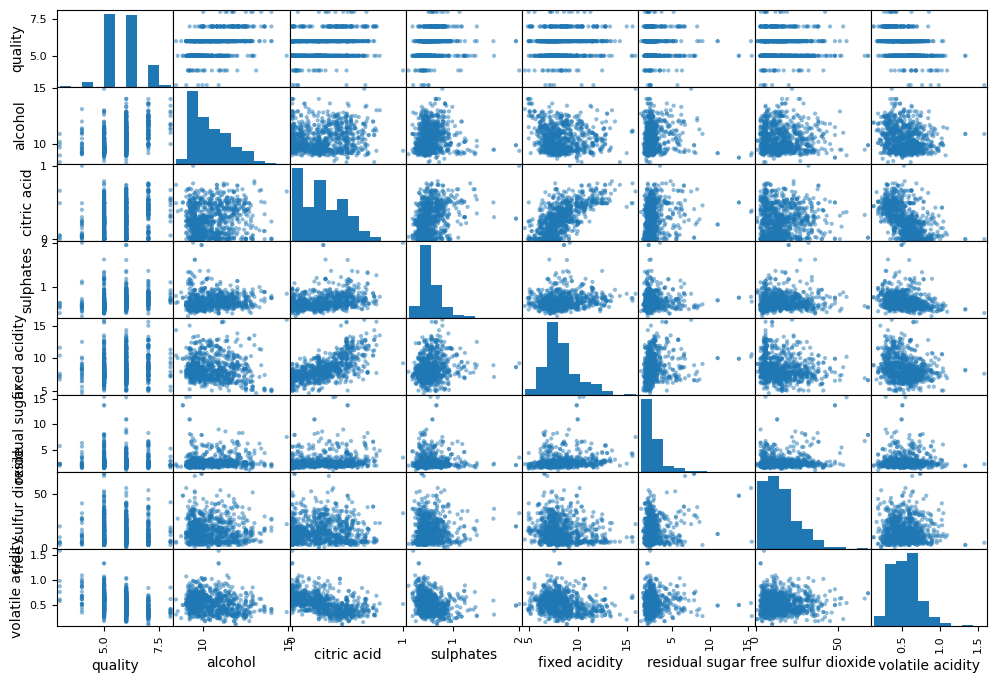

In [300]:
from pandas.plotting import scatter_matrix

attributes = ["quality", "alcohol", "citric acid",
              "sulphates","fixed acidity","residual sugar","free sulfur dioxide","volatile acidity"]
scatter_matrix(data[attributes], figsize=(12, 8))

# traitement de donnée (sans pipeline):

In [24]:
X_aci=data.iloc[::,-1::].values
X_all=data.iloc[::,:-2].values
X=np.concatenate((X_all,X_aci),axis=1)
Y=data.iloc[:,-2].values
"""X = train_set.copy()
X=data.drop("quality", axis=1)
Y= data["quality"].copy()"""

'X = train_set.copy()\nX=data.drop("quality", axis=1)\nY= data["quality"].copy()'

In [25]:
Y

array([7, 6, 5, 5, 7, 7, 7, 5, 5, 4, 6, 7, 5, 6, 6, 5, 5, 6, 6, 6, 6, 6,
       5, 6, 6, 5, 6, 6, 5, 5, 6, 6, 6, 5, 5, 7, 6, 6, 5, 6, 5, 6, 6, 5,
       7, 7, 5, 5, 6, 6, 6, 5, 6, 6, 6, 5, 5, 7, 4, 6, 6, 5, 6, 5, 5, 6,
       5, 6, 6, 6, 6, 5, 5, 5, 6, 5, 5, 7, 5, 6, 6, 6, 6, 6, 5, 6, 4, 5,
       7, 6, 5, 6, 6, 6, 5, 6, 5, 6, 5, 5, 6, 5, 6, 6, 6, 5, 5, 6, 5, 5,
       6, 6, 5, 5, 5, 7, 5, 6, 7, 5, 4, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6, 5,
       5, 5, 6, 5, 6, 6, 5, 6, 7, 6, 5, 5, 5, 6, 6, 7, 6, 5, 6, 5, 5, 6,
       6, 5, 6, 5, 5, 7, 6, 5, 5, 6, 5, 6, 6, 6, 6, 6, 5, 5, 5, 5, 7, 5,
       5, 6, 5, 5, 7, 6, 6, 6, 6, 6, 5, 5, 7, 5, 5, 7, 5, 6, 6, 6, 6, 5,
       5, 6, 8, 6, 5, 5, 6, 5, 7, 6, 5, 5, 5, 5, 6, 5, 6, 5, 6, 6, 7, 6,
       5, 5, 5, 7, 7, 7, 5, 6, 7, 5, 6, 5, 4, 7, 5, 7, 5, 5, 7, 7, 6, 6,
       5, 7, 7, 4, 6, 6, 5, 7, 6, 6, 6, 5, 5, 6, 5, 6, 8, 6, 6, 6, 8, 7,
       6, 6, 6, 5, 6, 6, 5, 6, 7, 6, 5, 6, 5, 5, 5, 6, 6, 5, 4, 6, 6, 5,
       6, 6, 7, 6, 5, 6, 7, 5, 4, 5, 7, 6, 4, 5, 6,

In [26]:
Y.shape

(914,)

In [27]:
X.shape

(914, 11)

In [28]:
X

array([[8.9, 0.38, 0.4, ..., 0.75, 12.6, 'medium'],
       [6.7, 0.46, 0.24, ..., 0.6, 10.6, 'medium'],
       [6.8, 0.48, 0.25, ..., 0.6, 10.4, 'medium'],
       ...,
       [7.6, 0.68, 0.02, ..., 1.08, 9.2, 'medium'],
       [7.7, 0.6, 0.06, ..., 0.62, 10.1, 'medium'],
       [6.7, 0.64, 0.23, ..., 0.7, 10.9, 'medium']], dtype=object)

In [29]:
data[data.isna()].count()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
sulphates               0
alcohol                 0
quality                 0
acidity                 0
dtype: int64

In [30]:
data.isnull().count()

fixed acidity           914
volatile acidity        914
citric acid             914
residual sugar          914
chlorides               914
free sulfur dioxide     914
total sulfur dioxide    914
density                 914
sulphates               914
alcohol                 914
quality                 914
acidity                 914
dtype: int64

In [31]:
sample_incomplete_rows = data[data.isnull().any(axis=1)].head()
sample_incomplete_rows

Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, sulphates, alcohol, quality, acidity]
Index: []

In [32]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])

In [33]:
X

array([[8.9, 0.38, 0.4, ..., 0.75, 12.6, 'medium'],
       [6.7, 0.46, 0.24, ..., 0.6, 10.6, 'medium'],
       [6.8, 0.48, 0.25, ..., 0.6, 10.4, 'medium'],
       ...,
       [7.6, 0.68, 0.02, ..., 1.08, 9.2, 'medium'],
       [7.7, 0.6, 0.06, ..., 0.62, 10.1, 'medium'],
       [6.7, 0.64, 0.23, ..., 0.7, 10.9, 'medium']], dtype=object)

In [34]:
X_acidity=data["acidity"]

In [35]:
X_acidity.head(10)

0    medium
1    medium
2    medium
3    medium
4      high
5    medium
6       low
7    medium
8    medium
9    medium
Name: acidity, dtype: object

In [36]:
X_acidity.shape

(914,)

In [37]:
X_acidity.unique

<bound method Series.unique of 0      medium
1      medium
2      medium
3      medium
4        high
        ...  
909    medium
910    medium
911    medium
912    medium
913    medium
Name: acidity, Length: 914, dtype: object>

In [38]:
X_acidityr=X_acidity.array.reshape(-1, 1)

In [39]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
X_acidity_encoded = ordinal_encoder.fit_transform(X_acidityr)
X_acidity_encoded[:, -1]

array([2., 2., 2., 2., 0., 2., 1., 2., 2., 2., 2., 0., 1., 2., 2., 2., 0.,
       2., 2., 0., 0., 1., 0., 0., 2., 0., 2., 2., 2., 2., 2., 2., 2., 0.,
       2., 2., 0., 2., 2., 2., 2., 0., 0., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 2., 0., 2., 2.,
       2., 1., 2., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 0., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 0.,
       2., 2., 2., 0., 2., 0., 2., 2., 2., 0., 2., 2., 2., 0., 2., 2., 2.,
       0., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 0., 1., 2., 2., 2., 2., 2., 2., 2., 0., 2.,
       2., 0., 0., 2., 2., 2., 2., 2., 0., 0., 1., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 0., 2., 2., 2., 2., 1., 0., 2., 2., 0., 2., 2., 2., 2.,
       2., 2., 2., 2., 0., 0., 2., 2., 2., 0., 2., 2., 0., 2., 0., 2., 2.,
       2., 2., 2., 2., 2.

In [40]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
X_acidity_1hot = cat_encoder.fit_transform(X_acidityr)
X_acidity_1hot

<914x3 sparse matrix of type '<class 'numpy.float64'>'
	with 914 stored elements in Compressed Sparse Row format>

In [41]:
X_dd=X_acidity_1hot.toarray()
X_dd

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [42]:
Y_qualite=data["quality"]

In [43]:
Y_qualite

0      7
1      6
2      5
3      5
4      7
      ..
909    5
910    6
911    4
912    6
913    5
Name: quality, Length: 914, dtype: int64

In [44]:
Y_qualite.shape

(914,)

In [45]:
Y_qualite=Y_qualite.array.reshape(-1, 1)

In [46]:
Y_qualite.shape

(914, 1)

In [47]:
"""from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
Y_1hot = cat_encoder.fit_transform(Y_qualite)
Y_1hot"""

'from sklearn.preprocessing import OneHotEncoder\n\ncat_encoder = OneHotEncoder()\nY_1hot = cat_encoder.fit_transform(Y_qualite)\nY_1hot'

In [48]:
#Y_1hot.shape

In [49]:
#Y_1hot=Y_1hot.toarray()
#Y_1hot

In [50]:
X_d=X[::,:-1]
X_d

array([[8.9, 0.38, 0.4, ..., 0.99486, 0.75, 12.6],
       [6.7, 0.46, 0.24, ..., 0.9948, 0.6, 10.6],
       [6.8, 0.48, 0.25, ..., 0.9953, 0.6, 10.4],
       ...,
       [7.6, 0.68, 0.02, ..., 0.9965, 1.08, 9.2],
       [7.7, 0.6, 0.06, ..., 0.99697, 0.62, 10.1],
       [6.7, 0.64, 0.23, ..., 0.99538, 0.7, 10.9]], dtype=object)

In [51]:
X_f=np.concatenate((X_d,X_dd),axis=1)
X_f

array([[8.9, 0.38, 0.4, ..., 0.0, 0.0, 1.0],
       [6.7, 0.46, 0.24, ..., 0.0, 0.0, 1.0],
       [6.8, 0.48, 0.25, ..., 0.0, 0.0, 1.0],
       ...,
       [7.6, 0.68, 0.02, ..., 0.0, 0.0, 1.0],
       [7.7, 0.6, 0.06, ..., 0.0, 0.0, 1.0],
       [6.7, 0.64, 0.23, ..., 0.0, 0.0, 1.0]], dtype=object)

In [52]:
X_f.shape

(914, 13)

In [53]:
#X_fd=X_f[:,:-2]
X_fd=X_f

In [54]:
X_fd.shape

(914, 13)

In [55]:
X_fd

array([[8.9, 0.38, 0.4, ..., 0.0, 0.0, 1.0],
       [6.7, 0.46, 0.24, ..., 0.0, 0.0, 1.0],
       [6.8, 0.48, 0.25, ..., 0.0, 0.0, 1.0],
       ...,
       [7.6, 0.68, 0.02, ..., 0.0, 0.0, 1.0],
       [7.7, 0.6, 0.06, ..., 0.0, 0.0, 1.0],
       [6.7, 0.64, 0.23, ..., 0.0, 0.0, 1.0]], dtype=object)

In [56]:
Y

array([7, 6, 5, 5, 7, 7, 7, 5, 5, 4, 6, 7, 5, 6, 6, 5, 5, 6, 6, 6, 6, 6,
       5, 6, 6, 5, 6, 6, 5, 5, 6, 6, 6, 5, 5, 7, 6, 6, 5, 6, 5, 6, 6, 5,
       7, 7, 5, 5, 6, 6, 6, 5, 6, 6, 6, 5, 5, 7, 4, 6, 6, 5, 6, 5, 5, 6,
       5, 6, 6, 6, 6, 5, 5, 5, 6, 5, 5, 7, 5, 6, 6, 6, 6, 6, 5, 6, 4, 5,
       7, 6, 5, 6, 6, 6, 5, 6, 5, 6, 5, 5, 6, 5, 6, 6, 6, 5, 5, 6, 5, 5,
       6, 6, 5, 5, 5, 7, 5, 6, 7, 5, 4, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6, 5,
       5, 5, 6, 5, 6, 6, 5, 6, 7, 6, 5, 5, 5, 6, 6, 7, 6, 5, 6, 5, 5, 6,
       6, 5, 6, 5, 5, 7, 6, 5, 5, 6, 5, 6, 6, 6, 6, 6, 5, 5, 5, 5, 7, 5,
       5, 6, 5, 5, 7, 6, 6, 6, 6, 6, 5, 5, 7, 5, 5, 7, 5, 6, 6, 6, 6, 5,
       5, 6, 8, 6, 5, 5, 6, 5, 7, 6, 5, 5, 5, 5, 6, 5, 6, 5, 6, 6, 7, 6,
       5, 5, 5, 7, 7, 7, 5, 6, 7, 5, 6, 5, 4, 7, 5, 7, 5, 5, 7, 7, 6, 6,
       5, 7, 7, 4, 6, 6, 5, 7, 6, 6, 6, 5, 5, 6, 5, 6, 8, 6, 6, 6, 8, 7,
       6, 6, 6, 5, 6, 6, 5, 6, 7, 6, 5, 6, 5, 5, 5, 6, 6, 5, 4, 6, 6, 5,
       6, 6, 7, 6, 5, 6, 7, 5, 4, 5, 7, 6, 4, 5, 6,

In [57]:
#Y_fd=Y_1hot[::,:-1]
#Y_fd=Y_1hot
#Y_fd

In [58]:
#Y_fd.shape

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_f, Y, test_size=0.2, random_state=0)

In [60]:
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## feature selection

In [202]:
X[:,:-1]

array([[8.9, 0.38, 0.4, ..., 0.99486, 0.75, 12.6],
       [6.7, 0.46, 0.24, ..., 0.9948, 0.6, 10.6],
       [6.8, 0.48, 0.25, ..., 0.9953, 0.6, 10.4],
       ...,
       [7.6, 0.68, 0.02, ..., 0.9965, 1.08, 9.2],
       [7.7, 0.6, 0.06, ..., 0.99697, 0.62, 10.1],
       [6.7, 0.64, 0.23, ..., 0.99538, 0.7, 10.9]], dtype=object)

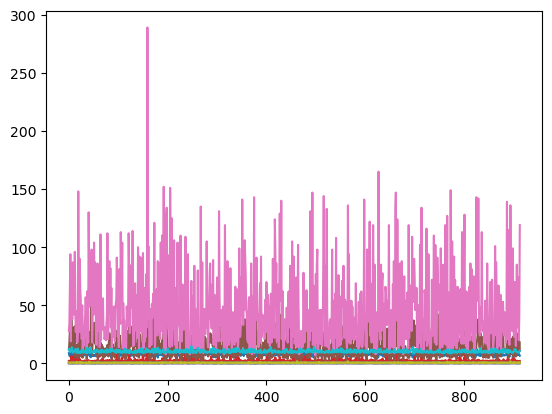

In [203]:
from sklearn.feature_selection import VarianceThreshold
X_num=X[:,:-1]
plt.plot(X_num)

In [204]:
X_num.var(axis=0)

array([3.12669245483579, 0.032691505705078755, 0.03913045513744391,
       2.0259026018798285, 0.0024641930389898907, 106.85122863887273,
       1073.886502030173, 3.869140427773168e-06, 0.031089355108236107,
       1.1697450886233105], dtype=object)

In [205]:
select=VarianceThreshold(threshold=0.2)
select.fit_transform(X_num)
select.get_support()

array([ True, False, False,  True, False,  True,  True, False, False,
        True])

In [206]:
from sklearn.feature_selection import SelectKBest,chi2

In [207]:
chi2(X_num,Y)

(array([6.41382696e+00, 1.07926864e+01, 9.95997035e+00, 3.90213994e+00,
        3.94956964e-01, 8.78582510e+01, 1.44364567e+03, 1.27429474e-04,
        3.45895530e+00, 2.79055173e+01]),
 array([2.68007517e-001, 5.56489156e-002, 7.63774467e-002, 5.63589816e-001,
        9.95467359e-001, 1.89260089e-017, 4.79997115e-310, 1.00000000e+000,
        6.29607112e-001, 3.79798171e-005]))

In [208]:
select1=SelectKBest(chi2,k=2)
select1.fit_transform(X_num,Y)

array([[12.0, 28.0],
       [18.0, 34.0],
       [29.0, 61.0],
       ...,
       [9.0, 20.0],
       [19.0, 41.0],
       [11.0, 119.0]], dtype=object)

In [209]:
X_num[::,7]

array([0.99486, 0.9948, 0.9953, 0.9944, 0.99434, 0.999, 0.99154, 0.99748,
       0.9978, 0.99565, 0.99672, 0.998, 0.9934, 1.0021, 0.99622, 0.9967,
       0.99702, 0.9986, 0.9929, 0.9948, 0.99747, 0.9987, 0.99784, 0.99652,
       0.99652, 0.9974, 0.996, 0.9946, 0.9942, 0.9955, 0.99498, 0.99814,
       0.99557, 0.9963, 0.9983, 0.9933, 0.99554, 0.99685, 0.9965, 0.99242,
       0.99818, 0.9964, 0.998, 0.99572, 0.99182, 0.99604, 0.99578,
       0.99592, 0.99553, 0.99685, 0.99489, 0.99632, 0.9949, 0.99745,
       0.9971, 0.99636, 0.9968, 0.99615, 1.001, 0.999, 0.99608, 0.9969,
       0.9955, 0.9962, 0.9982, 0.99474, 0.9978, 0.9962, 0.99646, 0.9962,
       0.9967, 0.9966, 0.99769, 0.9957, 0.99538, 0.9969, 0.9978, 0.99439,
       0.9998, 0.99572, 0.99704, 0.99543, 0.9984, 0.9964, 0.9958, 0.9964,
       0.9934, 0.9964, 0.9963, 0.99396, 0.99648, 0.9988, 0.99599, 0.9986,
       0.9964, 0.99379, 0.9968, 0.9952, 1.0001, 1.00315, 0.9977, 0.9994,
       0.99688, 0.9961, 0.9948, 0.9966, 0.9966, 1.0026

In [210]:
select1.get_support()

array([False, False, False, False, False,  True,  True, False, False,
       False])

In [214]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'sulphates', 'alcohol', 'quality', 'acidity'],
      dtype='object')

In [219]:
#np.array(data.columns)[select1.get_support()]

In [548]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import SGDRegressor

select2=SelectFromModel(SGDRegressor(),threshold='mean')
select2.fit_transform(X_num,Y)
select2.get_support()


array([ True,  True, False, False, False,  True, False, False, False,
        True])

In [549]:
select2.estimator_

SGDRegressor()

In [550]:
select2.estimator_.coef_

array([ 2.90409382e+10,  1.59701058e+10, -1.20789052e+10,  8.38659065e+09,
       -1.04888387e+09,  3.18236514e+10, -4.89919806e+08,  5.24311957e+09,
        9.12634661e+09, -2.46379937e+10])

In [551]:
select2.estimator_.coef_.shape

(10,)

In [552]:
select2.estimator_.coef_.mean(axis=0)

6133504964.092222

In [553]:
from sklearn.feature_selection import RFE,RFECV
select3=RFE(SGDRegressor(),step=1,n_features_to_select=4,verbose=2)
select3.fit_transform(X_num,Y)
select3.ranking_

Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.


array([1, 1, 6, 2, 7, 1, 3, 5, 1, 4])

In [554]:
select3.get_params

<bound method BaseEstimator.get_params of RFE(estimator=SGDRegressor(), n_features_to_select=4, verbose=2)>

## Transformation Pipelines

In [76]:
X = data.drop('quality', axis = 1)
Y = data['quality']

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [78]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import make_union
from sklearn.compose import make_column_selector

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder,OrdinalEncoder,OneHotEncoder


num_attribs = make_column_selector(dtype_include=np.number)
X_cat_attribs = ['acidity']

pipeline_parallel = make_union(SimpleImputer(strategy="mean"),StandardScaler())

num_pipeline = make_pipeline(SimpleImputer(strategy="mean"),StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"),OrdinalEncoder(), OneHotEncoder())

In [79]:
num_attribs

In [80]:
from sklearn.compose import make_column_transformer

transformeur = make_column_transformer((num_pipeline,num_attribs),
                                        (cat_pipeline,X_cat_attribs))

full_pipeline = make_pipeline(transformeur)

In [81]:
vin_prepared = full_pipeline.fit_transform(data)

# *Model*

**dans cette partie on va essayer tout les models possible et selectioner le model optimal**

## SGDRegressor :

In [30]:
from sklearn.linear_model import SGDRegressor
sgd_reg = make_pipeline(transformeur,SGDRegressor(random_state=42))
sgd_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002430874D040>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   Ordinal

In [31]:
from sklearn.metrics import mean_squared_error
y_pred = sgd_reg.predict(X_test)
val_error = mean_squared_error(y_test, y_pred,squared = False) 
print("Validation RMSE:", val_error)    

Validation RMSE: 0.6287802717305437


In [32]:
y_pred

array([5.7454062 , 6.59436946, 5.09360991, 5.93038276, 6.30696378,
       5.48032947, 5.16158719, 5.04648787, 6.13808821, 5.88058731,
       5.17697945, 5.47195726, 5.62263431, 6.04227155, 5.33198994,
       6.07805935, 6.64020896, 6.6127431 , 5.96031211, 5.54764689,
       5.58403615, 6.16443686, 5.14241803, 5.91116421, 5.09957697,
       5.23216359, 4.93248424, 5.59904183, 5.47157605, 5.73906113,
       6.06027181, 5.85382529, 5.77824716, 5.34279256, 4.65384781,
       5.07750674, 4.76451048, 5.82711047, 5.69631003, 6.10082769,
       5.71009111, 5.15660986, 5.30882746, 6.30640741, 5.96321897,
       6.47533507, 5.05234462, 6.77912909, 6.33447098, 5.20806442,
       5.39057488, 6.35187559, 5.21227179, 6.63877594, 5.08494432,
       5.99609089, 5.49482796, 5.63552457, 6.30640741, 5.05006475,
       5.58392888, 6.22477918, 6.45787122, 4.97569955, 5.33878026,
       5.65738435, 6.63373132, 5.52655696, 5.83354019, 5.94971389,
       4.75632476, 5.54088056, 5.56119748, 5.70195711, 5.05006

In [33]:
Y

0      7
1      6
2      5
3      5
4      7
      ..
909    5
910    6
911    4
912    6
913    5
Name: quality, Length: 914, dtype: int64

# Les Modeles de penalisations 

## Ridge

In [145]:
from sklearn.linear_model import Ridge
ridge_reg = make_pipeline(transformeur,Ridge(alpha=1,solver="cholesky"))
ridge_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000025C9009E730>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   Ordinal

In [146]:
from sklearn.metrics import mean_squared_error
y_pred = ridge_reg.predict(X_test)
val_error = mean_squared_error(y_test, y_pred,squared = False) 
print("Validation RMSE:", val_error)   

Validation RMSE: 0.6061961755749694


In [147]:
ridge_reg = make_pipeline(transformeur,Ridge(alpha=1,solver="sag"))
ridge_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000025C9009E730>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   Ordinal

In [148]:
from sklearn.metrics import mean_squared_error
y_pred = ridge_reg.predict(X_test)
val_error = mean_squared_error(y_test, y_pred,squared = False) 
print("Validation RMSE:", val_error)

Validation RMSE: 0.606143155412267


## Lasso

In [149]:
from sklearn.linear_model import Lasso
lasso_reg = make_pipeline(transformeur,Lasso(alpha=0.5))
lasso_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000025C9009E730>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   Ordinal

In [150]:
from sklearn.metrics import mean_squared_error
y_pred = lasso_reg.predict(X_test)
val_error = mean_squared_error(y_test, y_pred,squared = False) 
print("Validation RMSE:", val_error)

Validation RMSE: 0.7956371678530423


## ElasticNet

In [151]:
from sklearn.linear_model import ElasticNet
elastic_net = make_pipeline(transformeur,ElasticNet(alpha=0.1,l1_ratio=0.5))
elastic_net.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000025C9009E730>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   Ordinal

In [152]:
from sklearn.metrics import mean_squared_error
y_pred = elastic_net.predict(X_test)
val_error = mean_squared_error(y_test, y_pred,squared = False) 
print("Validation RMSE:", val_error)

Validation RMSE: 0.6235668651354619


# Ensemble learning

# boosting

## XGBOOST & (GridSearch CV, RandomizedSearch CV) :

In [470]:
try:
    import xgboost
except ImportError as ex:
    print("Error: the xgboost library is not installed.")
    xgboost = None

In [92]:
bst = xgboost.XGBRegressor(n_estimators=200, max_depth=16, learning_rate=0.1)
bst.fit(X_train, y_train)
y_pred = bst.predict(X_test)

In [93]:
from sklearn.metrics import mean_squared_error
val_error = mean_squared_error(y_test, y_pred,squared = False) 
print("Validation RMSE:", val_error)  

Validation RMSE: 0.5453374557343824


In [94]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10,50,70,100,200,500], 'max_depth': [2, 4,6,8,16,20, 100,200],
     'learning_rate': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]},
  ]

xgbst_cv = xgboost.XGBRegressor()
grid_search = GridSearchCV(xgbst_cv, param_grid, cv=5,
                           scoring='neg_mean_absolute_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=N

In [95]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 100, 'n_estimators': 500}

In [96]:
modelf= grid_search.best_estimator_
modelf.score(X_test,y_test)

0.4924264057121196

In [97]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_depth': randint(low=1, high=16),
        'learning_rate':randint(low=0.1, high=2.0),
    }

xgbst_rd = xgboost.XGBRegressor()
grid_search = GridSearchCV(xgbst_rd, param_grid, cv=5,
                           scoring='neg_mean_absolute_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=N

In [98]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 100, 'n_estimators': 500}

In [99]:
modelf= grid_search.best_estimator_
modelf.score(X_test,y_test)

0.4924264057121196

## GradientBoosting & (GridSearch CV, RandomizedSearch CV) :

In [100]:
from sklearn.ensemble import GradientBoostingRegressor
# create a GradientBoostingRegressor that reproduces the previous example
gbrt = GradientBoostingRegressor(max_depth=200, n_estimators=16,
                                 learning_rate=0.3, random_state=42)
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.3, max_depth=200, n_estimators=16,
                          random_state=42)

In [101]:
from sklearn.metrics import mean_squared_error
y_pred = gbrt.predict(X_test)
val_error = mean_squared_error(y_test, y_pred,squared = False) 
print("Validation RMSE:", val_error)  

Validation RMSE: 0.7380016159097099


In [102]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10,50,70,100,200,500], 'max_depth': [2, 4,6,8,16,20, 100,200],
     'learning_rate': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]},
  ]

gbst_cv = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(gbst_cv, param_grid, cv=5,
                           scoring='neg_mean_absolute_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             param_grid=[{'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                            0.8, 0.9, 1.0],
                          'max_depth': [2, 4, 6, 8, 16, 20, 100, 200],
                          'n_estimators': [3, 10, 50, 70, 100, 200, 500]}],
             return_train_score=True, scoring='neg_mean_absolute_error')

In [103]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 500}

In [104]:
modelf= grid_search.best_estimator_
modelf.score(X_test,y_test)

0.5175395055558851

In [105]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_depth': randint(low=1, high=16),
        'learning_rate':randint(low=0.1, high=2.0),
    }

gbst_rd = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(gbst_rd, param_grid, cv=5,
                           scoring='neg_mean_absolute_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             param_grid=[{'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                            0.8, 0.9, 1.0],
                          'max_depth': [2, 4, 6, 8, 16, 20, 100, 200],
                          'n_estimators': [3, 10, 50, 70, 100, 200, 500]}],
             return_train_score=True, scoring='neg_mean_absolute_error')

In [106]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 500}

In [107]:
modelf= grid_search.best_estimator_
modelf.score(X_test,y_test)

0.5175395055558851

## ADABOOST & (GridSearch CV, RandomizedSearch CV) :

In [127]:
from sklearn.ensemble import AdaBoostRegressor
ada_rg =   AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=1), n_estimators=200,
    learning_rate=0.5, random_state=42)
ada_rg.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=1),
                  learning_rate=0.5, n_estimators=200, random_state=42)

In [128]:
from sklearn.metrics import mean_squared_error
y_pred = ada_rg.predict(X_test)
val_error = mean_squared_error(y_test, y_pred,squared = False) 
print("Validation RMSE:", val_error)  

Validation RMSE: 0.6641608434518437


In [129]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10,50,70,100,200,500],
     'learning_rate': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}
  ]

adbst_cv = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),random_state=42)
grid_search = GridSearchCV(adbst_cv, param_grid, cv=5,
                           scoring='neg_mean_absolute_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4),
                                         random_state=42),
             param_grid=[{'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                            0.8, 0.9, 1.0],
                          'n_estimators': [3, 10, 50, 70, 100, 200, 500]}],
             return_train_score=True, scoring='neg_mean_absolute_error')

In [130]:
grid_search.best_params_

{'learning_rate': 0.9, 'n_estimators': 50}

In [131]:
modelf= grid_search.best_estimator_
modelf.score(X_test,y_test)

0.43592302332599275

In [134]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=500),
        'learning_rate':randint(low=0.1, high=2.0),
    }

adbst_rd = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),random_state=42)
grid_search = GridSearchCV(adbst_rd, param_grid, cv=5,
                           scoring='neg_mean_absolute_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4),
                                         random_state=42),
             param_grid=[{'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                            0.8, 0.9, 1.0],
                          'n_estimators': [3, 10, 50, 70, 100, 200, 500]}],
             return_train_score=True, scoring='neg_mean_absolute_error')

In [135]:
grid_search.best_params_

{'learning_rate': 0.9, 'n_estimators': 50}

In [136]:
modelf= grid_search.best_estimator_
modelf.score(X_test,y_test)

0.43592302332599275

# Bagging

In [115]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

bag_rg = BaggingRegressor(DecisionTreeRegressor(), n_estimators=500,max_samples=30,bootstrap=True, n_jobs=-1, random_state=42)
bag_rg.fit(X_train, y_train)

y_pred = bag_rg.predict(X_test)

In [116]:
from sklearn.metrics import mean_squared_error
y_pred = bag_rg.predict(X_test)
val_error = mean_squared_error(y_test, y_pred,squared = False) 
print("Validation RMSE:", val_error) 

Validation RMSE: 0.6116219590278191


In [118]:
tree_rg = DecisionTreeRegressor()
tree_rg.fit(X_train, y_train)
y_pred_tree = tree_rg.predict(X_test)
val_error = mean_squared_error(y_test, y_pred_tree,squared = False) 
print("Validation RMSE:", val_error) 

Validation RMSE: 0.775301809732741


In [120]:
bag_rg = BaggingRegressor(DecisionTreeRegressor(), n_estimators=500,max_samples=30,
                            oob_score=True, n_jobs=-1, random_state=42)
bag_rg.fit(X_train, y_train)
bag_rg.oob_score_

0.3712308610969155

In [132]:
from sklearn.ensemble import RandomForestRegressor

rnd_rg =RandomForestRegressor(n_estimators=500, max_leaf_nodes=16,
                                 n_jobs=-1, random_state=42)
rnd_rg.fit(X_train, y_train)

y_pred_rf = rnd_rg.predict(X_test)

In [133]:
from sklearn.metrics import mean_squared_error
val_error = mean_squared_error(y_test, y_pred_rf,squared = False) 
print("Validation RMSE:", val_error) 

Validation RMSE: 0.5803538172162207


## RandomForest & (GridSearch CV, RandomizedSearch CV) :

In [261]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False,True], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_c = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_c, param_grid, cv=5,
                           scoring='neg_mean_absolute_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False, True], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_absolute_error')

In [262]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 2, 'n_estimators': 10}

In [263]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=2, n_estimators=10,
                      random_state=42)

In [264]:
grid_search.cv_results_

{'mean_fit_time': array([0.00993228, 0.02318382, 0.05038671, 0.00579476, 0.01891537,
        0.05302315, 0.01407099, 0.0338706 , 0.07450333, 0.00997219,
        0.02481127, 0.07574172, 0.00647426, 0.02975965, 0.00870376,
        0.0273808 , 0.00690322, 0.01925678, 0.00544262, 0.01477537,
        0.00528536, 0.01684771, 0.00671883, 0.02139788]),
 'std_fit_time': array([0.00094613, 0.00357721, 0.00603637, 0.00032691, 0.00061657,
        0.00265007, 0.00330932, 0.00943447, 0.01953309, 0.0004532 ,
        0.00210857, 0.0053369 , 0.00079385, 0.00708867, 0.00242831,
        0.00983928, 0.00052808, 0.00030734, 0.00046804, 0.00070974,
        0.00039946, 0.00070471, 0.00085893, 0.00343534]),
 'mean_score_time': array([0.00119162, 0.00203452, 0.00373411, 0.00095282, 0.00150585,
        0.00416493, 0.00178676, 0.00229759, 0.00395794, 0.00111604,
        0.00168343, 0.00389714, 0.0013648 , 0.00376668, 0.00139565,
        0.00180359, 0.00106158, 0.00186667, 0.00063577, 0.00150681,
        0.000725

In [265]:
best_precision=grid_search.best_score_
best_precision

-0.4439176218432578

In [266]:
modelf= grid_search.best_estimator_
modelf.score(X_test,y_test)

0.5020136583515129

In [257]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_c = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_c, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_absolute_error', random_state=42)
rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000018593DEFE50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000018593DEF1C0>},
                   random_state=42, scoring='neg_mean_absolute_error')

In [258]:
rnd_search.best_params_

{'max_features': 7, 'n_estimators': 180}

In [259]:
modelrdfr= rnd_search.best_estimator_
modelrdfr.score(X_test,y_test)

0.5349939577251537

# Voting & Stacking :

In [21]:
try:
    import xgboost
except ImportError as ex:
    print("Error: the xgboost library is not installed.")
    xgboost = None
    
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor

In [22]:
adaboost_regress = AdaBoostRegressor(learning_rate=0.9,n_estimators=50)
xgboost_regress =xgboost.XGBRegressor(n_estimators=200, max_depth=16, learning_rate=0.1)
svm_regres =  SVR(C=1.0, gamma=0.1,kernel='rbf')

In [61]:
estimators = [adaboost_regress, xgboost_regress, svm_regres]
for estimator in estimators:
    print("Training the", estimator)
    estimator.fit(X_train, y_train)

Training the AdaBoostRegressor(learning_rate=0.9)
Training the XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=16, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
Training the SVR(gamma=0.1)


In [62]:
[estimator.score(X_test, y_test) for estimator in estimators]

[0.40106964082130214, 0.5276775021980195, 0.4903983486325121]

In [63]:
from sklearn.ensemble import VotingRegressor
voting_rg = [
    ("adaboost_regress",adaboost_regress),
    ("xgboost_regress", xgboost_regress),
    ("svm_regres", svm_regres),
]

In [64]:
from sklearn.metrics import mean_squared_error
for clf in (adaboost_regress, xgboost_regress,svm_regres):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    print(clf.__class__.__name__, mean_squared_error(y_test, y_pred,squared = False))

AdaBoostRegressor 0.6194806625661766
XGBRegressor 0.5453374557343824
SVR 0.5664497959553852


In [65]:
voting_rg = VotingRegressor(voting_rg)

In [66]:
voting_rg.fit(X_train, y_train)

VotingRegressor(estimators=[('adaboost_regress',
                             AdaBoostRegressor(learning_rate=0.9)),
                            ('xgboost_regress',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_polic...
                                          importance_type=None,
                                          interaction_constraints=None,
                               

In [67]:
voting_rg.score(X_test, y_test)

0.5322453852351732

In [68]:
voting_rg.voting = "soft"
voting_rg.named_estimators["svm_regres"].probability = True

In [69]:
voting_rg.estimators

[('adaboost_regress', AdaBoostRegressor(learning_rate=0.9)),
 ('xgboost_regress',
  XGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=16, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=200, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...)),
 ('svm_regres', SVR(gamma=0.1))]

In [70]:
from sklearn.metrics import mean_squared_error
for clf in (adaboost_regress, xgboost_regress,svm_regres, voting_rg):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    print(clf.__class__.__name__, mean_squared_error(y_test, y_pred,squared = False))

AdaBoostRegressor 0.6131224873010166
XGBRegressor 0.5453374557343824
SVR 0.5664497959553852
VotingRegressor 0.5410049372394808


In [71]:
voting_rg.score(X_test, y_test)

0.535152569896008

In [72]:
voting_rg.estimators

[('adaboost_regress', AdaBoostRegressor(learning_rate=0.9)),
 ('xgboost_regress',
  XGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=16, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=200, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...)),
 ('svm_regres', SVR(gamma=0.1))]

In [73]:
voting_rg.estimators_

[AdaBoostRegressor(learning_rate=0.9),
 XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=16, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...),
 SVR(gamma=0.1)]

In [74]:
voting_rg.named_estimators_

{'adaboost_regress': AdaBoostRegressor(learning_rate=0.9),
 'xgboost_regress': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=16, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...),
 'svm_regres': SVR(gamma=0.1)}

### on va utiliser maintenant le stacking

In [151]:
!pip install mlxtend 

In [192]:
from mlxtend.regressor import StackingRegressor
from sklearn.model_selection import GridSearchCV

ridge = Ridge(random_state=1)
elasticnet = ElasticNet(alpha=0.1,l1_ratio=0.5)
lasso = Lasso(random_state=1)
svr_rbf = SVR(kernel='rbf')
#svm_regres
regressors = [ridge, lasso,elasticnet,adaboost_regress,xgboost_regress]
stregr = StackingRegressor(regressors=regressors, 
                           meta_regressor=svr_rbf)

params = {'lasso__alpha': [0.1, 1.0, 10.0],
          'ridge__alpha': [0.1, 1.0, 10.0],
          'elasticnet__alpha' : [0.1, 1.0, 10.0],
          'meta_regressor__C': [0.1, 1.0, 10.0, 100.0],
          'meta_regressor__gamma': [0.1, 1.0, 10.0]}

grid_stack = GridSearchCV(estimator=stregr, 
                    param_grid=params, 
                    cv=5,
                    scoring='neg_mean_absolute_error',
                    verbose=2,
                    refit=True)


grid_stack.fit(X_train,y_train)

print("Best: %f using %s" % (grid_stack.best_score_, grid_stack.best_params_))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END elasticnet__alpha=0.1, lasso__alpha=0.1, meta_regressor__C=0.1, meta_regressor__gamma=0.1, ridge__alpha=0.1; total time=   0.7s
[CV] END elasticnet__alpha=0.1, lasso__alpha=0.1, meta_regressor__C=0.1, meta_regressor__gamma=0.1, ridge__alpha=0.1; total time=   0.7s
[CV] END elasticnet__alpha=0.1, lasso__alpha=0.1, meta_regressor__C=0.1, meta_regressor__gamma=0.1, ridge__alpha=0.1; total time=   0.8s
[CV] END elasticnet__alpha=0.1, lasso__alpha=0.1, meta_regressor__C=0.1, meta_regressor__gamma=0.1, ridge__alpha=0.1; total time=   1.4s
[CV] END elasticnet__alpha=0.1, lasso__alpha=0.1, meta_regressor__C=0.1, meta_regressor__gamma=0.1, ridge__alpha=0.1; total time=   1.0s
[CV] END elasticnet__alpha=0.1, lasso__alpha=0.1, meta_regressor__C=0.1, meta_regressor__gamma=0.1, ridge__alpha=1.0; total time=   0.9s
[CV] END elasticnet__alpha=0.1, lasso__alpha=0.1, meta_regressor__C=0.1, meta_regressor__gamma=0.1, ridge__alpha=1

In [193]:
grid_stack.best_estimator_

StackingRegressor(meta_regressor=SVR(C=0.1, gamma=0.1),
                  regressors=[Ridge(alpha=0.1, random_state=1),
                              Lasso(alpha=0.1, random_state=1), ElasticNet(),
                              AdaBoostRegressor(learning_rate=0.9),
                              XGBRegressor(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=...
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None

In [194]:
grid_stack.best_params_

{'elasticnet__alpha': 1.0,
 'lasso__alpha': 0.1,
 'meta_regressor__C': 0.1,
 'meta_regressor__gamma': 0.1,
 'ridge__alpha': 0.1}

In [195]:
grid_stack.score(X_test, y_test)

-0.3774895421361057

In [196]:
from sklearn.metrics import mean_squared_error
y_pred = grid_stack.predict(X_test)
val_error = mean_squared_error(y_test, y_pred,squared = False) 
print("Validation RMSE:", val_error) 

Validation RMSE: 0.5421912816429846


### premier test

# SVM & (GridSearch CV, RandomizedSearch CV) : 

In [130]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000.]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

regressor=SVR()
grid_searchSVM = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_absolute_error', verbose=2)
grid_searchSVM.fit(X_train, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] END ..............................C=10.0, kernel=linear; total time=   0.1s
[CV] END ..............................C=10.0, kernel=linear; total time=   0.1s
[CV] END ..............................C=10.0, kernel=linear; total time=   0.2s
[CV] END ..............................C=10.0, kernel=linear; total time=   0.2s
[CV] END ..............................C=10.0, kernel=linear; total time=   0.1s
[CV] END ..............................C=30.0, kernel=linear; total time=   0.5s
[CV] END ..............................C=30.0, kernel=linear; total time=   0.6s
[CV] END ..............................C=30.0, kernel=linear; total time=   0.5s
[CV] END ..............................C=30.0, kernel=linear; total time=   0.6s
[CV] END ..............................C=30.0, kernel=linear; total time=   0.4s
[CV] END .............................C=100.0, kernel=linear; total time=   1.4s
[CV] END .............................C=100.0, 

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             scoring='neg_mean_absolute_error', verbose=2)

In [131]:
grid_searchSVM.best_params_

{'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf'}

In [132]:
grid_searchSVM.best_estimator_

SVR(gamma=0.1)

In [133]:
modelSVM= grid_searchSVM.best_estimator_
modelSVM.score(X_test,y_test)

0.4903983486325121

In [127]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from scipy.stats import randint
from scipy.stats import expon, reciprocal

param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 1500),
        'gamma': expon(scale=1.0),
    }

regressor_2 = SVR()
rnd_searchSVM = RandomizedSearchCV(regressor_2,param_distributions=param_distribs,
                                n_iter=50, cv=5, scoring='neg_mean_absolute_error',
                                verbose=2, random_state=42)
rnd_searchSVM.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END C=100.76638165889705, gamma=3.010121430917521, kernel=linear; total time=   1.4s
[CV] END C=100.76638165889705, gamma=3.010121430917521, kernel=linear; total time=   1.4s
[CV] END C=100.76638165889705, gamma=3.010121430917521, kernel=linear; total time=   1.6s
[CV] END C=100.76638165889705, gamma=3.010121430917521, kernel=linear; total time=   1.8s
[CV] END C=100.76638165889705, gamma=3.010121430917521, kernel=linear; total time=   1.9s
[CV] END C=579.4265453136359, gamma=0.9084469696321253, kernel=rbf; total time=   0.0s
[CV] END C=579.4265453136359, gamma=0.9084469696321253, kernel=rbf; total time=   0.0s
[CV] END C=579.4265453136359, gamma=0.9084469696321253, kernel=rbf; total time=   0.0s
[CV] END C=579.4265453136359, gamma=0.9084469696321253, kernel=rbf; total time=   0.0s
[CV] END C=579.4265453136359, gamma=0.9084469696321253, kernel=rbf; total time=   0.0s
[CV] END C=39.221958700185176, gamma=0.05983876860868

RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=50,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000024313041A60>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000024310959E20>,
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=2)

In [187]:
rnd_searchSVM.best_params_

{'C': 100.76638165889705, 'gamma': 3.010121430917521, 'kernel': 'linear'}

In [129]:
modelRSVM= rnd_searchSVM.best_estimator_
modelRSVM.score(X_test,y_test)

0.43705992498038293

# Reseau de neuron & (GridSearch CV) :

In [2]:
import tensorflow as tf
from tensorflow import keras

In [373]:
"""from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
def mmodel(optimizer):
   model = tf.keras.models.Sequential()
   #la decision pourquoi j'ai choisis 9 dans la premier couche :13(input)+6(output)/2...j'ai pris la moyenne
   model.add(tf.keras.layers.Dense(9, activation='relu', kernel_initializer='he_normal', input_shape=(13,)))
   model.add(tf.keras.layers.BatchNormalization())
   model.add(tf.keras.layers.Dense(15,activation="relu",  kernel_initializer="he_normal"))
   model.add(tf.keras.layers.BatchNormalization())
   model.add(tf.keras.layers.Dropout(rate=0.2))
   model.add(tf.keras.layers.Dense(15,activation="relu", kernel_initializer="he_normal"))
   model.add(tf.keras.layers.BatchNormalization())
   model.add(tf.keras.layers.Dropout(rate=0.2))
   model.add(tf.keras.layers.Dense(6))
   model.compile(optimizer=optimizer, loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
   return model
model_gd=KerasRegressor(build_fn=mmodel)
param={"epochs":[16,30,50,100,500], "batch_size":[32,40,60,100],"optimizer":["adam","nadam"]}
grid_search=GridSearchCV(estimator=model_gd,param_grid=param,scoring=tf.keras.metrics.RootMeanSquaredError(),cv=10)"""

'from keras.wrappers.scikit_learn import KerasRegressor\nfrom sklearn.model_selection import GridSearchCV\ndef mmodel(optimizer):\n   model = tf.keras.models.Sequential()\n   #la decision pourquoi j\'ai choisis 9 dans la premier couche :13(input)+6(output)/2...j\'ai pris la moyenne\n   model.add(tf.keras.layers.Dense(9, activation=\'relu\', kernel_initializer=\'he_normal\', input_shape=(13,)))\n   model.add(tf.keras.layers.BatchNormalization())\n   model.add(tf.keras.layers.Dense(15,activation="relu",  kernel_initializer="he_normal"))\n   model.add(tf.keras.layers.BatchNormalization())\n   model.add(tf.keras.layers.Dropout(rate=0.2))\n   model.add(tf.keras.layers.Dense(15,activation="relu", kernel_initializer="he_normal"))\n   model.add(tf.keras.layers.BatchNormalization())\n   model.add(tf.keras.layers.Dropout(rate=0.2))\n   model.add(tf.keras.layers.Dense(6))\n   model.compile(optimizer=optimizer, loss=\'mse\', metrics=[tf.keras.metrics.RootMeanSquaredError()])\n   return model\nmode

In [96]:
"""best_param=grid_search.best_params_
best_param"""

'best_param=grid_search.best_params_\nbest_param'

In [97]:
"""best_precision=grid_search.best_score_
best_precision"""

'best_precision=grid_search.best_score_\nbest_precision'

In [98]:
from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

In [88]:
#la decision pourquoi j'ai choisis 9 dans la premier couche :13(input)+6(output)/2...j'ai pris la moyenne
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(9, activation='relu', kernel_initializer='he_normal', input_shape=(13,)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(20,activation="relu",  kernel_initializer="he_normal"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(20,activation="relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(6))

In [89]:
model.compile(loss='mse',
              optimizer='adam',
              metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [90]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 9)                 126       
                                                                 
 batch_normalization_6 (Batc  (None, 9)                36        
 hNormalization)                                                 
                                                                 
 dense_9 (Dense)             (None, 20)                200       
                                                                 
 batch_normalization_7 (Batc  (None, 20)               80        
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 20)                0         
                                                                 
 dense_10 (Dense)            (None, 20)               

In [91]:
from tensorflow.keras.callbacks import EarlyStopping

In [92]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [93]:
history = model.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/500
23/23 [==============================] - 7s 36ms/step - loss: 34.0933 - root_mean_squared_error: 5.8389 - val_loss: 29.0222 - val_root_mean_squared_error: 5.3872
Epoch 2/500
23/23 [==============================] - 0s 9ms/step - loss: 32.8477 - root_mean_squared_error: 5.7313 - val_loss: 29.1732 - val_root_mean_squared_error: 5.4012
Epoch 3/500
23/23 [==============================] - 0s 8ms/step - loss: 32.0494 - root_mean_squared_error: 5.6612 - val_loss: 28.7811 - val_root_mean_squared_error: 5.3648
Epoch 4/500
23/23 [==============================] - 0s 9ms/step - loss: 30.9246 - root_mean_squared_error: 5.5610 - val_loss: 28.1010 - val_root_mean_squared_error: 5.3010
Epoch 5/500
23/23 [==============================] - 0s 9ms/step - loss: 29.8256 - root_mean_squared_error: 5.4613 - val_loss: 26.9741 - val_root_mean_squared_error: 5.1937
Epoch 6/500
23/23 [==============================] - 0s 8ms/step - loss: 28.5060 - root_mean_squared_error: 5.3391 - val_loss: 25.6483

In [94]:
model.metrics_names

['loss', 'root_mean_squared_error']

In [95]:
losses = pd.DataFrame(model.history.history)

In [96]:
losses.head()

loss  root_mean_squared_error   val_loss  val_root_mean_squared_error
0  34.093292                 5.838947  29.022215                     5.387227
1  32.847652                 5.731287  29.173187                     5.401220
2  32.049377                 5.661217  28.781057                     5.364798
3  30.924562                 5.560986  28.100956                     5.301033
4  29.825558                 5.461278  26.974062                     5.193656

<AxesSubplot:>

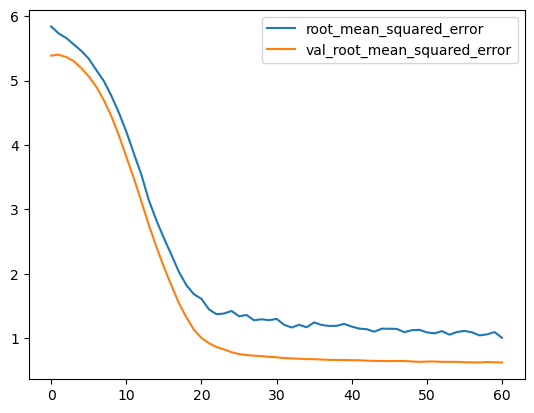

In [97]:
losses[['root_mean_squared_error','val_root_mean_squared_error']].plot()

<AxesSubplot:>

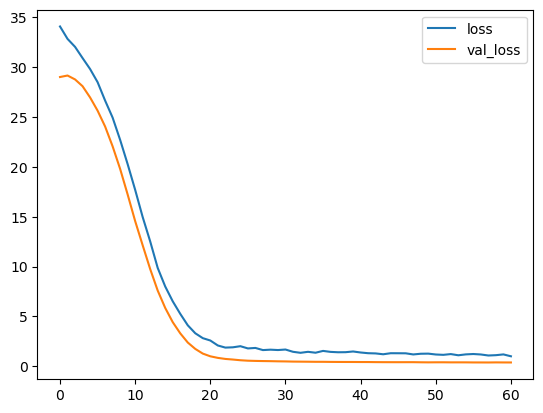

In [98]:
losses[['loss','val_loss']].plot()

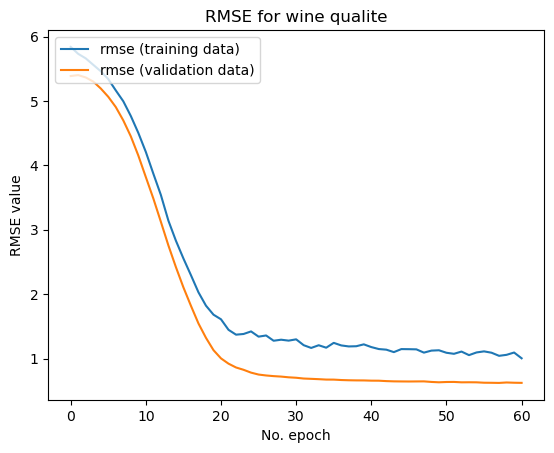

In [99]:
plt.plot(history.history['root_mean_squared_error'], label='rmse (training data)')
plt.plot(history.history['val_root_mean_squared_error'], label='rmse (validation data)')
plt.title('RMSE for wine qualite')
plt.ylabel('RMSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [100]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

Evaluate on test data
6/6 [==============================] - 0s 3ms/step - loss: 0.3873 - root_mean_squared_error: 0.6223
test loss, test acc: [0.38726040720939636, 0.6223025321960449]


# Test Resultat

In [15]:
X_final=data_ev

In [16]:
X_final.shape

(229, 12)

In [17]:
X_final=X_final.drop("id", axis=1)

In [18]:
X_final.shape

(229, 11)

In [19]:
X_final

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0              6.6             0.440         0.09             2.2      0.063   
1              9.5             0.885         0.27             2.3      0.084   
2              8.8             0.460         0.45             2.6      0.065   
3              7.8             0.630         0.48             1.7      0.100   
4              5.6             0.500         0.09             2.3      0.049   
..             ...               ...          ...             ...        ...   
224           10.0             0.590         0.31             2.2      0.090   
225            8.5             0.370         0.20             2.8      0.090   
226            8.6             0.685         0.10             1.6      0.092   
227           12.0             0.390         0.66             3.0      0.093   
228            6.8             0.570         0.00             2.5      0.072   

     free sulfur dioxide  total sulfur dioxide  density  sulphates  alcohol  \
0                    9.0                  18.0  0.99444       0.69    11.30   
1                   31.0                 145.0  0.99780       0.53     9.40   
2                    7.0                  18.0  0.99470       0.79    14.00   
3                   14.0                  96.0  0.99610       0.62     9.50   
4                   17.0                  99.0  0.99370       0.63    13.00   
..                   ...                   ...      ...        ...      ...   
224                 26.0                  62.0  0.99940       0.63    10.20   
225                 18.0                  58.0  0.99800       0.70     9.60   
226                  3.0                  12.0  0.99745       0.65     9.55   
227                 12.0                  30.0  0.99960       0.63    10.80   
228                 32.0                  64.0  0.99491       0.56    11.20   

    acidity  
0    medium  
1    medium  
2    medium  
3    medium  
4       low  
..      ...  
224  medium  
225  medium  
226  medium  
227  medium  
228  medium  

[229 rows x 11 columns]

### *j'ai choisis Voting qui basé sur  (XGBRegressor,SVM,ADABOOST) comme model final*

#### *remarque les modeles utilisé sont deja ajuster par grid_search CV*

In [82]:
xgb_freg = make_pipeline(transformeur,voting_rg)
xgb_freg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000016ACF247AC0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord...
                                                           importance_type=None,
   

In [83]:
from sklearn.metrics import mean_squared_error
y_pred = xgb_freg.predict(X_final)

In [84]:
y_pred.shape

(229,)

In [85]:
idd=np.arange(229,dtype=int)
idd

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [86]:
idd.shape

(229,)

In [87]:
y_pred

array([6.38826463, 4.93090287, 6.55168101, 5.13220351, 5.94108727,
       5.56842919, 5.73979617, 6.0257731 , 5.32604623, 6.68342207,
       5.18926047, 6.67038385, 5.91496504, 5.87902077, 6.66570399,
       4.90248636, 5.18068831, 5.34627295, 5.82306321, 6.3954994 ,
       5.48176075, 6.66547616, 5.57516695, 5.91881687, 4.62534079,
       5.46199253, 5.35186412, 5.39443345, 6.28380568, 5.59820795,
       5.89119878, 6.89008035, 6.37357248, 6.22877919, 5.18829452,
       6.40534279, 5.38075427, 5.70449547, 5.88888823, 5.06180268,
       5.13658074, 5.55434099, 5.6876278 , 6.04641553, 5.41496257,
       5.86311744, 5.21904146, 5.77069791, 5.46811498, 5.20592987,
       6.2930767 , 6.28753196, 6.19646556, 5.93106297, 5.27979002,
       5.02110131, 6.29589626, 5.82542187, 4.94871344, 6.01393307,
       5.87161068, 5.2778286 , 6.06525007, 6.45029245, 5.44512987,
       6.07389373, 5.15729398, 5.47985526, 5.09402581, 5.94451911,
       6.14848715, 5.2017088 , 7.21677601, 6.81597648, 5.98657

In [88]:
submission=np.column_stack((idd.astype(int),y_pred))
submission

array([[  0.        ,   6.38826463],
       [  1.        ,   4.93090287],
       [  2.        ,   6.55168101],
       [  3.        ,   5.13220351],
       [  4.        ,   5.94108727],
       [  5.        ,   5.56842919],
       [  6.        ,   5.73979617],
       [  7.        ,   6.0257731 ],
       [  8.        ,   5.32604623],
       [  9.        ,   6.68342207],
       [ 10.        ,   5.18926047],
       [ 11.        ,   6.67038385],
       [ 12.        ,   5.91496504],
       [ 13.        ,   5.87902077],
       [ 14.        ,   6.66570399],
       [ 15.        ,   4.90248636],
       [ 16.        ,   5.18068831],
       [ 17.        ,   5.34627295],
       [ 18.        ,   5.82306321],
       [ 19.        ,   6.3954994 ],
       [ 20.        ,   5.48176075],
       [ 21.        ,   6.66547616],
       [ 22.        ,   5.57516695],
       [ 23.        ,   5.91881687],
       [ 24.        ,   4.62534079],
       [ 25.        ,   5.46199253],
       [ 26.        ,   5.35186412],
 

In [89]:
submission.shape

(229, 2)

In [90]:
submission_df = pd.DataFrame(y_pred, columns = ['quality'])
print(type(submission_df))

<class 'pandas.core.frame.DataFrame'>


In [91]:
submission_df

quality
0    6.388265
1    4.930903
2    6.551681
3    5.132204
4    5.941087
..        ...
224  5.577775
225  5.566510
226  5.206207
227  6.008324
228  5.699722

[229 rows x 1 columns]

In [92]:
sub=submission_df.to_csv(index=True)
print(sub)

,quality
0,6.388264631144033
1,4.930902866472325
2,6.551681008479349
3,5.132203514315666
4,5.941087267393215
5,5.568429186470271
6,5.739796166256798
7,6.0257730983505455
8,5.3260462320388555
9,6.683422067676086
10,5.1892604731666205
11,6.67038385354337
12,5.9149650383299495
13,5.8790207683424285
14,6.665703992543524
15,4.902486361630121
16,5.180688310132644
17,5.346272950456698
18,5.823063205953576
19,6.395499396438787
20,5.481760747086994
21,6.665476160483739
22,5.575166949476864
23,5.9188168743722835
24,4.6253407914725555
25,5.461992529752003
26,5.351864117156134
27,5.39443344838583
28,6.283805680077175
29,5.598207950237178
30,5.891198784409305
31,6.890080352875079
32,6.373572483584685
33,6.228779194832278
34,5.188294523495928
35,6.405342787926273
36,5.380754267650061
37,5.704495474383712
38,5.88888822521611
39,5.061802678018128
40,5.1365807363430465
41,5.554340992044508
42,5.687627796479265
43,6.0464155288842205
44,5.4149625709150975
45,5.863117443935368
46,5.219041459262758
47,5.77